# Task: Implement a one-dimensional Schelling model

Your turn!

Let's dial it back a bit and get a handle on a one dimensional model of segregation. This is good modelling practice!

**Coding objectives:** Create and manipulate a 1D array, generate random numbers with particular distributions, plot.

## The model inputs

### Initialisation of the world
A random initialisation of $N=70$ individuals. An individual is characterised as one of two types {o, +}:
<div>
<img src="images/OriginalSchelling_1D_t0.png" width="600">
</div>
Figure from the original model proposed by [Schelling in 1971](https://doi.org/10.1080/0022250X.1971.9989794). The dots above the individual indicate those in an 'unhappy' state.


### Defining the state of 'happiness'
An agent is happy when at least <font color='red'>half</font> of its neighbours are similar to it. Note that the percentage of similar neighbours here is a parameter of our model! I've coloured it in red so we can keep an eye on our assumptions.

Clearly, happiness depends on how we define the neighbourhood

### Defining the neighbourhood
If the neighbourhood is the entire line in Fig. 1 then having generated (in this case) an even number of circles and crosses everyone has a neighbourhood that is 50:50, and everyone is happy.

If, on the other hand, <font color='red'>the neighbourhood is just yourself and some, let's say 4, of your neighbours to the left and 4 to the right</font>, then 26/70 are unhappy (as indicated by the dots above the individual symbols). This is the definition of happiness that Schelling explored.

We will also need to carefully define the boundary of this world and, in particular, the neighbourhoods for individuals who find themselves on the boundary. Let's just say these individuals have less neighbours. 

## Dynamics
Who moves first? 

The movement Schelling proposed was actually a little different to what we saw in 2D...
- <font color='red'>An unhappy individual moved to the nearest point at which they would be happy. There were no empty spaces, the individual 'merely intrudes himself between two others when he gets there'.</font>
- <font color='red'>The order of movement of the unhappy individuals was from left to right.</font>

In contrast to Schelling, <font color='red'>we randomly choose an individual, and if they are unhappy they will move to a randomly selected empty location </font>.

## The model outputs
Below is an example showing both an intermediate and a stable configuration after several rounds of movement:

<div>
<img src="images/OriginalSchelling_1D_tf.png" width="600">
</div>

This gives a **qualitative** impression of the system’s behaviour. Visually, segregation seems to be occurring — but how can we **quantify** it?

To compare the extent of segregation under different conditions — and to observe how it evolves over time — Schelling introduced the **Mean Similarity Ratio (MSR)**:

$$
\mathcal{S}_{\text{MSR}} = \frac{1}{N} \sum_{i=1}^{N} \frac{n_s}{8},
$$
where:
- $n_s$ is the number of neighbours **similar** to individual $i$,
- each individual has a **symmetric neighbourhood** of radius 4 (i.e. 8 possible neighbours),
- and $N$ is the number of individuals in the system.

In the case shown in the figure above:
$$
\mathcal{S}_{\text{MSR}} = \frac{1}{70} \cdot \frac{440}{8} = 0.815
$$

This means that, on average, each individual has a similarity ratio of about **5:1** — that is, five neighbours of the same type for every one that is different. However, individuals in the model only require a minimum of **5:4** similarity (i.e. 5 of 9 neighbours) to feel satisfied.  

So while the model allows some diversity, the collective behaviour still leads to **stronger segregation than the individual threshold demands**.

---

However, the formula above assumes every individual has exactly 8 neighbours — which isn’t true when <font color='red'>empty spaces are allowed</font>. To handle this, we define an individual's **personal similarity ratio** as:

$$
\mathcal{S}_i = \frac{n_s}{n},
$$
where:
- $n_s$ is the number of similar neighbours,
- $n$ is the number of **non-empty** neighbours in the neighbourhood of $i$.

Then the **mean similarity ratio** becomes:
$$
\mathcal{S}_{\text{MSR}} = \frac{1}{N} \sum_{i=1}^{N} \mathcal{S}_i,
$$

This refined version gives a more accurate, quantitative description of segregation — one that remains valid even when the grid includes unoccupied positions.

## Coding all of this up

### Initialisation

How do we generate a random initialisation as in Fig. 1? 

Schelling took the circles and crosses to be the even and odd numbers in a list of random integers.

<font color='red'>Because we are including empty locations for unhappy individuals to move to</font> there are 3 states that each location could be assigned. <font color='red'/>I will randomly select one of the states with a given probability.</font>

What is the structure that we will use to hold this information? 

This too is a choice, but is not something that should affect the outcome of the model. i.e. Model outputs should be robust to the initial configuration because we are usually interested in the system’s intrinsic dynamics, not artefacts of how it was seeded. If small changes in initial conditions lead to drastically different or unstable behaviour, it may suggest that the model is overly sensitive, poorly generalised, or not capturing the core mechanisms it's meant to represent. Robustness ensures that any patterns or behaviours we observe are genuine features of the model, not consequences of arbitrary starting points.

I'm using a 1D grid with 3 states (empty=0, yellow=1 and blue=2).

In [4]:
# Initialise the world... 

import numpy as np

grid_size = 100  # Size of the grid
p_state_init = [0.2, 0.4, 0.4] #the probability of states {empty,yellow,blue}
grid = np.random.choice([0, 1, 2], size=grid_size, p=p_state_init) #choose state from {0,1,2} with probabilities p_state_init.
grid_initial = np.copy(grid) #I'm copying this for later

display(grid)

array([2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0, 0, 0, 2, 1,
       2, 0, 1, 0, 0, 2, 1, 1, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 2, 1, 1, 2, 1, 0, 2, 2, 2, 1, 2, 1, 1, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1,
       0, 2, 2, 2, 2, 1, 2, 1, 0, 1, 1, 2])

### Troubleshooting: "ModuleNotFoundError" (e.g. No module named 'numpy')
If the grid displayed then ignore this section.

If you see an error like:
```ModuleNotFoundError: No module named 'numpy'```
it usually means you're running the notebook in the wrong environment, or the environment hasn’t been set up fully.

The math3024 environment is an isolated workspace that contains all the Python libraries needed for this course. It keeps your system clean and ensures consistency — everyone runs the notebooks with the same setup, so you won’t get weird bugs caused by mismatched versions of libraries like numpy or matplotlib.

#### Steps to fix it
**1. Check if the `math3024` environment exists**

In your terminal, run:
```bash
conda info --envs
```

You should see something like:
```
# conda environments:
#
base                  *  /opt/miniconda3
math3024                 /opt/miniconda3/envs/math3024
```

If `math3024` **doesn’t appear**, create it:
```bash
conda create -n math3024 python=3.11
```

**2. Activate the environment**
```bash
conda activate math3024
```

Check you're in the right one:
```bash
which python
```

You should see a path like:
```
/opt/miniconda3/envs/math3024/bin/python
```

**3. Install required packages**
Make sure you’re in the folder that contains `requirements.txt`, then run:
```bash
conda install --file requirements.txt
```

To confirm that `numpy` is installed:
```bash
conda list numpy
```

You should see something like:
```
# packages in environment at /opt/miniconda3/envs/math3024:
#
# Name                     Version          Build            Channel
numpy                      2.3.1            pypi_0           pypi
```

**4. (Important) Make sure Jupyter uses the `math3024` environment**
Jupyter can accidentally launch with the wrong Python version. To fix this:
```bash
conda install ipykernel
python -m ipykernel install --user --name=math3024 --display-name "Python (math3024)"
```

Then launch Jupyter from the *activated environment*:
```bash
jupyter notebook
```

Inside Jupyter, change the kernel to:
```
Kernel → Change Kernel → Python (math3024)
```

To confirm, run this in a notebook cell:
```python
import sys
print(sys.executable)
```

If the output path includes `/envs/math3024/`, you're good to go.

---

#### Why not just use base?

You *could* install everything globally in your base environment, but that's not recommended:

* It pollutes your system Python with course-specific packages
* You lose reproducibility: notebooks might break later if libraries update
* Conflicts between packages are more likely

Using `math3024` keeps things clean and contained — and ensures your notebooks behave exactly like everyone else's.

In [5]:
#Select the individual of interest...

non_empty_locs = np.where(grid != 0)[0] #find occupied grid locations
idx = np.random.choice(non_empty_locs) #randomly select a point on the grid that is occupied
print("Selected individual's index = ", idx)
print("Selected individual's state = ", grid[idx])

#Observe the neighbourhood of the selected individual idx...

neighbourhood = grid[max(0, idx - 4):min(grid_size, idx + 5)]
print("neighbourhood is:", neighbourhood)

Selected individual's index =  85
Selected individual's state =  2
neighbourhood is: [0 2 1 0 2 1 1 0 2]


In [6]:
#Compute the similarity ratio of idx...

num_similar_neighbours = np.count_nonzero(neighbourhood == grid[idx])-1 #ignore self
num_neighbours = np.count_nonzero(neighbourhood)-1 #ignore empty and self
similarity_ratio = num_similar_neighbours/num_neighbours # Compute the fraction of neighbours with the same type for individual i
print("Similarity ratio of agent", idx, ":", similarity_ratio)

# Check if idx is happy...

similarity_threshold = 0.5  # Minimum fraction of same-type neighbors for happiness

if similarity_ratio < similarity_threshold:
    print("agent is unhappy")
else: state = print("agent is happy")

Similarity ratio of agent 85 : 0.4
agent is unhappy


In [7]:
# Move to an empty location if unhappy...

if similarity_ratio < similarity_threshold: #then unhappy
    empty_locs = np.where(grid == 0)[0] #find empty locations (possible moves). Note that this assumes empty_indices is not an empty array.
    new_idx = np.random.choice(empty_locs)
    grid[new_idx] = grid[idx] #move to new location
    grid[idx] = 0 #empty old location
else: 
    new_idx = idx

### Qualitative analysis 
Our code seems reasonable, but is it working as we expect? Up the ladder we go...

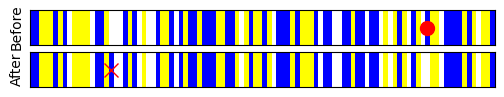

In [8]:
#Visualise the initial grid configuration and the new configuration after a single move...
# highlight the individual who is deciding whether to move

#Make things a bit prettier...
# 1. remove ticks and labels
# 2. change colormap to align with Nicky Case's Parable of the polygons

import matplotlib.pyplot as plt
import matplotlib.cm as cm
colours = ['white', 'yellow', 'blue'] # Define the colour values
cmap = cm.colors.ListedColormap(colours) # Create a custom colormap


# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 1))

# Plot on the first subplot
axs[0].imshow(grid_initial.reshape((1, grid_size)), cmap=cmap, aspect='auto')
axs[0].set_ylabel('Before')
axs[0].set_xticks([])
axs[0].set_yticks([])

# Plot on the second subplot
axs[1].imshow(grid.reshape((1, grid_size)), cmap=cmap, aspect='auto')
axs[1].set_ylabel('After')
axs[1].set_xticks([])
axs[1].set_yticks([])

# Add a red cross on top of the random index value
axs[0].plot(idx, 0, 'ro', markersize=10)
axs[1].plot(new_idx, 0, 'rx', markersize=10);

### Iterating for more dynamics
Happy that things are working as expected we now we need to iterate this process for many relocation moves.

Back down the ladder...

We could proceed, repeating the process of choosing a random individual, checking their state and moving them if they are unhappy but there is a lot of wasted computation in doing it this way and the simulation may be slow to proceed. 

Instead, we'll randomly select an individual *from the unhappy ones*. We'll need to compute each individual's similarity ratio first.

In [9]:
#Compute similarity ratio for all individuals...

similarity_ratio_list = []  # To store similarity ratios for each grid location
grid_size = np.size(grid)
for idx in range(grid_size):
    # Extract the neighborhood around the current grid location
    neighbourhood = grid[max(0, idx - 4):min(grid_size, idx + 5)]
    
    # Compute the number of similar neighbors (excluding the grid location itself)
    num_similar_neighbours = np.count_nonzero(neighbourhood == grid[idx]) - 1
    
    # Compute the total number of neighbors (excluding empty cells and the grid location itself)
    num_neighbours = np.count_nonzero(neighbourhood) - 1
    
    # Compute the similarity ratio for the current grid location
    similarity_ratio = num_similar_neighbours / num_neighbours if num_neighbours > 0 else 0
    
    similarity_ratio_list.append(similarity_ratio)

# Convert the similarity_ratio_list to a numpy array (optional, but helpful for further processing)
similarity_ratio_array = np.array(similarity_ratio_list)

print("All similarity ratios:", similarity_ratio_array)

All similarity ratios: [0.25       0.4        0.5        0.42857143 0.42857143 0.28571429
 0.71428571 0.14285714 0.         0.66666667 0.66666667 0.5
 0.66666667 0.         0.33333333 0.4        0.2        0.6
 0.16666667 0.4        0.4        0.25       0.33333333 0.75
 0.4        0.4        0.4        0.25       0.4        0.4
 0.5        0.         0.42857143 0.28571429 0.71428571 0.71428571
 0.25       0.5        0.625      0.625      0.375      0.28571429
 0.42857143 0.42857143 0.57142857 0.         0.42857143 0.28571429
 0.66666667 0.5        0.42857143 0.28571429 0.         0.57142857
 0.57142857 0.42857143 0.42857143 0.5        0.42857143 0.42857143
 0.42857143 0.5        0.4        0.6        0.8        0.4
 0.4        0.83333333 0.8        0.         0.83333333 0.83333333
 0.16666667 0.6        0.6        0.4        0.4        0.4
 0.4        0.2        0.6        0.75       0.2        0.6
 0.75       0.75       0.4        0.4        0.4        0.5
 0.57142857 0.57142857 0.66

In [10]:
# Now we can run things as before but being more selective about ```idx```:
# Select an individual to move from those who are unhappy...
unhappy_idxs = np.where(similarity_ratio_array < similarity_threshold)[0] #Find the unhappy individuals
idx = np.random.choice(unhappy_idxs) #randomly select a unhappy individual

# Move to an empty location (because we already know individual is unhappy)...
empty_locs = np.where(grid == 0)[0] #find empty locations (possible moves). Note that this assumes empty_indices is not an empty array.
new_idx = np.random.choice(empty_locs) #randomly select an empty location
grid[new_idx] = grid[idx] #update grid to reflect the move to new location 
grid[idx] = 0 #update grid to reflect empty old location 

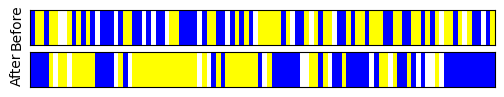

In [11]:
# Given that we are needing to initialise the grid again, I will package up the previous code that achieved this into a function so we can reuse it.

def initialise_grid(grid_size: int=100, p_state_init: list=[0.2, 0.4, 0.4], N_types: int = 3) -> np.ndarray:
    """
    Initializes a grid of given size with random states according to the specified probabilities.

    INPUTS:
        grid_size (int): The size of the grid (default is 100).
        p_state_init (list): A list containing the initial state probabilities for each type of state.
                             The list should have length N_types and the probabilities should sum to 1.
                             The default is [0.2, 0.4, 0.4].
        N_types (int): The number of different state types (default is 3).

    OUTPUTS:
        np.ndarray: A 1-dimensional numpy array representing the initialised grid.
                    The elements in the array are integers representing the state types (0 to N_types-1).
    """
    states = list(range(N_types))
    grid = np.random.choice(states, size=grid_size, p=p_state_init) #choose state from {states} with probabilities {p_state_init}.

    return grid

relocation_moves = 5000

#initialise grid
grid = initialise_grid() #default parameters being used
grid_initial = np.copy(grid)

for n in range(relocation_moves):
   #Select the person (an agent) of interest
    non_empty_locs = np.where(grid != 0)[0] #find empty locations (possible moves)
    idx = np.random.choice(non_empty_locs)

    # Compute the fraction of neighbours with the same type...
    neighbours = grid[max(0, idx - 1):min(grid_size, idx + 2)]
    fraction_same_type = np.mean(neighbours == grid[idx])
    
    # Move to an empty location if unhappy
    similarity_threshold = 0.8  # Minimum fraction of same-type neighbors for happiness

    if fraction_same_type < similarity_threshold: #then unhappy
        empty_indices = np.where(grid == 0)[0] #find empty locations (possible moves). Note that this assumes empty_indices is not an empty array.
        new_idx = np.random.choice(empty_indices)
        grid[new_idx] = grid[idx] #move to new location
        grid[idx] = 0 #empty old location

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 1))

# Plot on the first subplot
axs[0].imshow(grid_initial.reshape((1, grid_size)), cmap=cmap, aspect='auto')
axs[0].set_ylabel('Before')
axs[0].set_xticks([])
axs[0].set_yticks([])

# Plot on the second subplot
axs[1].imshow(grid.reshape((1, grid_size)), cmap=cmap, aspect='auto')
axs[1].set_ylabel('After')
axs[1].set_xticks([])
axs[1].set_yticks([]);

### Quantitative analysis
How segregated does this society end up being?

In [12]:
def compute_mean_similarity_ratio(grid):
    #Compute similarity ratio for all individuals...

    similarity_ratio_list = []  # To store similarity ratios for each grid location
    grid_size = np.size(grid)
    
    for idx in range(grid_size):
        # Extract the neighborhood around the current grid location
        neighbourhood = grid[max(0, idx - 4):min(grid_size, idx + 5)]

        # Compute the number of similar neighbors (excluding the grid location itself)
        num_similar_neighbours = np.count_nonzero(neighbourhood == grid[idx]) - 1

        # Compute the total number of neighbors (excluding empty cells and the grid location itself)
        num_neighbours = np.count_nonzero(neighbourhood) - 1

        # Compute the similarity ratio for the current grid location
        similarity_ratio = num_similar_neighbours / num_neighbours if num_neighbours > 0 else 0

        similarity_ratio_list.append(similarity_ratio)

    # Convert the similarity_ratio_list to a numpy array (optional, but helpful for further processing)
    similarity_ratio_array = np.array(similarity_ratio_list)
    mean_similarity_ratio = np.mean(similarity_ratio_array)
    return mean_similarity_ratio

#Example usage:
mean_similarity_ratio_f = compute_mean_similarity_ratio(grid)
print("Final mean similarity ratio=", mean_similarity_ratio_f)

Final mean similarity ratio= 0.6200357142857142


# Explore
Below are some ideas to help you think deeper about the model and code.

##### Analysis
1. Did things get more segregated? What was the segregation coefficient of the initial grid? How does the amount of segregation evolve in time?
2. Are you confident in the mean similarity ratio computation? You might like to check some pathological examples...

    ```grid = np.array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2])  # Perfect segregation```
    
    ```grid = np.array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2])  # Perfect mixing```
3. Why is the amount of segregation, as defined by, $\mathcal{S}_{\text{MSR}}$, not equal to one and zero for perfect segregation and mixing respectively? 
4. The definition of our segregation metric is a choice, and there are many other choices we could have made to capture the amount of segregation. Can you think of another one that takes a more global perspective? How successful is your measure at capturing the various distributional characteristics?
5. Is the happiness of the group improving over time? Is it monotonic? Plot this and check.
6. We've only explored one ```similarity_threshold```, we'd like to climb higher up the ladder and abstract over many to gain an understanding of how this parameter impacts the model behaviour.
7. We have fixed the number of ```relocation_moves```. Are they all used? Think about smarter ways to do this.

##### Code understanding and improvements
1. Do you know what the code is doing? If not, break it up into more manageable chunks and observe the output. For example:
```num_similar_neighbours = np.count_nonzero(neighbourhood == grid[idx]) - 1```

    - ```print(neighbourhood == grid[idx])```
    
    - ```print(np.count_nonzero(neighbourhood == grid[idx]))```
2. To run statistics or parameter sweeps we would like to package the iteration of the individual moves into proper functions so things are cleaner. For example, you might consider a function to run the entire simulation:

    ```def run_simulation():
        return something_interesting ```
3. You might like to try doing this using a dataframe structure and the library pandas instead of the numpy array approach we have taken here.
4. We're only observing the initial and the final configurations. If you want to see everything in between what can you do?
5. How would your code need to change to apply to a two-dimensional grid?

What else did you tinker with/discover? Let me know so I can add to this Notebook for future semesters!